# Financial Planning with APIs and Simulations


In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Loading the environment variables from the .env file
load_dotenv()

True

## Part 1: Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet
In this section,we determine the current value of a member’s cryptocurrency wallet by collecting the current prices for the Bitcoin and Ethereum cryptocurrencies using API and Python Requests library
* Assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH) and monthly income is USD 12000.

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income= 12000

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = f"https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = f"https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
print(json.dumps(btc_response, indent=4, sort_keys= True))

{
    "data": {
        "1": {
            "circulating_supply": 18924456,
            "id": 1,
            "last_updated": 1641761918,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 803206043341,
                    "percent_change_1h": -0.815361530638331,
                    "percent_change_24h": 3.39110506414266,
                    "percent_change_7d": -11.2729818475937,
                    "percentage_change_1h": -0.815361530638331,
                    "percentage_change_24h": 3.39110506414266,
                    "percentage_change_7d": -11.2729818475937,
                    "price": 42426.0,
                    "volume_24h": 19449159631
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18924456,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys= True))

{
    "data": {
        "1027": {
            "circulating_supply": 119092984,
            "id": 1027,
            "last_updated": 1641761934,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 380401705900,
                    "percent_change_1h": -0.529272470101519,
                    "percent_change_24h": 4.92719672059742,
                    "percent_change_7d": -15.5425188389876,
                    "percentage_change_1h": -0.529272470101519,
                    "percentage_change_24h": 4.92719672059742,
                    "percentage_change_7d": -15.5425188389876,
                    "price": 3192.76,
                    "volume_24h": 13285743753
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119092984,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"Current price of BTC: USD {btc_price:.2f}")

Current price of BTC: USD 42426.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"Current price of ETH: USD {eth_price:.2f}")

Current price of ETH: USD 3192.76


In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"Current value of BTC holding: USD {btc_value:.2f}")

Current value of BTC holding: USD 50911.20


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"Current value of ETH holding: USD {eth_value:.2f}")

Current value of ETH holding: USD 16921.63


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Current cryptocurrency wallet balance: USD {total_crypto_wallet:.2f}")

Current cryptocurrency wallet balance: USD 67832.83


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, we determine the current value of a member’s stock and bond holdings. We make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). 
* Assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion.

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key= os.getenv("ALPACA_API_KEY")
alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api= tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2"
)

In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers= ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe= '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
start_date= pd.Timestamp('2021-12-31', tz= "America/New_York").isoformat()
end_date= pd.Timestamp('2021-12-31', tz= "America/New_York").isoformat()



In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

ticker_price_df= api.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end= end_date,
).df

# Review the first 5 rows of the Alpaca DataFrame
ticker_price_df.head()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-12-31 00:00:00-05:00  114.15  114.31  114.06  114.09  6557778  475.64   

                                                             
                             high     low   close    volume  
time                                                         
2021-12-31 00:00:00-05:00  476.86  474.67  474.89  51212452

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(ticker_price_df['AGG']['close'])

# Print the AGG closing price
print(f"AGG closing price: {agg_close_price:.2f}")

AGG closing price: 114.09


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(ticker_price_df['SPY']['close'])


# Print the SPY closing price
print(f"SPY closing price: {spy_close_price:.2f}")


SPY closing price: 474.89


In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"Current value of bond portfolio: USD {agg_value}")

Current value of bond portfolio: USD 22818.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"Current value of stock portfolio: USD {spy_value}")

Current value of stock portfolio: USD 52237.9


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Current balance of stock and bond portion of portfolio: USD {total_stocks_bonds:.2f}")


Current balance of stock and bond portion of portfolio: USD 75055.90


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print total value of the member's entire savings portfolio
print(f" Total value of entire savings portfolio: USD {total_portfolio:.2f}")


 Total value of entire savings portfolio: USD 142888.73


### Evaluate the Emergency Fund

In [23]:
# Consolidate financial assets data into a Python list
savings_data= [total_crypto_wallet , total_stocks_bonds]

# Review the Python list savings_data

print(savings_data)

[67832.828, 75055.9]


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df= pd.DataFrame(savings_data,columns= ['amount'], index= ['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df

,amount
crypto,67832.828
stock/bond,75055.900


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

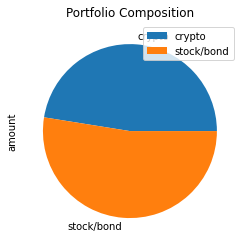

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y= 'amount',title= 'Portfolio Composition')


In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value= 3*monthly_income
print(f"Emergency fund value: USD {emergency_fund_value}")

Emergency fund value: USD 36000


In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations! You have enough money in this fund.")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations! You have reached the important financial goal.")
else:
    print(f"You are USD {emergency_fund_value-total_portfolio} away from reaching the goal.")


Congratulations! You have enough money in this fund.


## Part 2: Financial Planner for Retirement

### Creating the Monte Carlo Simulation

In this section, we use the MCForecastTools library to create a Monte Carlo simulation of 500 samples for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG). savings portfolio. 

In [28]:
# Set start and end dates of 3 years back from current date
prices_start_date= pd.Timestamp('2018-12-31', tz= "America/New_York").isoformat()
prices_end_date= pd.Timestamp('2021-12-31', tz= "America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows= 1000

In [29]:
# Use the Alpaca get_barset function to make the API call
# Add the df property to the end of the call to get the response returned as a DataFrame

ticker_prices_df= api.get_barset(
    tickers,
    timeframe,
    start= prices_start_date,
    end= prices_end_date,
    limit= limit_rows
).df

# Display both the first and last five rows of the DataFrame
display(ticker_prices_df.head())
display(ticker_prices_df.tail())

AGG                                          \
                             open     high       low    close      volume   
time                                                                        
2018-12-31 00:00:00-05:00  106.12  106.510  105.6200  106.495   8349838.0   
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756.0   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265.0   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476.0   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2018-12-31 00:00:00-05:00  249.56  250.16  247.47  248.55  100767777  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2021-12-27 00:00:00-05:00  114.15  114.30  114.13  114.27  5069840.0  472.03   
2021-12-28 00:00:00-05:00  114.43  114.45  114.17  114.22  4892072.0  477.72   
2021-12-29 00:00:00-05:00  113.99  114.05  113.81  113.87  5712959.0  477.00   
2021-12-30 00:00:00-05:00  113.99  114.13  113.83  114.12  5044053.0  477.93   
2021-12-31 00:00:00-05:00  114.15  114.31  114.06  114.09  6557778.0  475.64   

                                                             
                             high     low   close    volume  
time                                                         
2021-12-27 00:00:00-05:00  477.31  472.01  477.27  46260198  
2021-12-28 00:00:00-05:00  478.81  476.06  476.89  37370466  
2021-12-29 00:00:00-05:00  478.56  475.92  477.46  47223213  
2021-12-30 00:00:00-05:00  479.00  475.67  476.15  44681636  
2021-12-31 00:00:00-05:00  476.86  474.67  474.89  51212452

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_portfolio_30year= MCSimulation(
    portfolio_data=ticker_prices_df,
    weights= [0.4, 0.6],
    num_simulation=500,
    num_trading_days=252*30
)

    
# Review the simulation input data
MC_portfolio_30year.portfolio_data.head()


AGG                                          \
                             open     high       low    close      volume   
time                                                                        
2018-12-31 00:00:00-05:00  106.12  106.510  105.6200  106.495   8349838.0   
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756.0   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265.0   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476.0   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-12-31 00:00:00-05:00          NaN  249.56  250.16  247.47  248.55   
2019-01-02 00:00:00-05:00     0.000845  245.98  251.21  245.95  249.89   
2019-01-03 00:00:00-05:00     0.004081  248.23  248.57  244.03  244.46   
2019-01-04 00:00:00-05:00    -0.003037  247.59  253.11  247.17  252.41   
2019-01-07 00:00:00-05:00    -0.002109  252.69  255.95  251.69  254.40   

                                                   
                              volume daily_return  
time                                               
2018-12-31 00:00:00-05:00  100767777          NaN  
2019-01-02 00:00:00-05:00  107236613     0.005391  
2019-01-03 00:00:00-05:00  113782919    -0.021730  
2019-01-04 00:00:00-05:00  122528832     0.032521  
2019-01-07 00:00:00-05:00   88317608     0.007884

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_30year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shivangigupta/Desktop/GitHub_Upload/challenge5_clone/challenge5_financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005777,0.994957,1.014175,1.009018,0.995383,0.985308,1.002483,0.997308,0.999813,0.996919,...,0.981864,1.005487,0.996094,0.986519,0.992971,0.997045,1.010888,1.011841,1.004652,0.989450
2,1.015266,0.992364,1.005972,1.000755,0.996884,0.990617,1.007125,0.995433,0.992218,0.986617,...,0.987702,0.996877,1.002446,0.986422,0.977101,0.997705,1.018774,1.026475,1.005689,0.979747
3,1.023628,0.988653,1.011244,0.997666,0.996315,0.980802,1.016873,0.990272,0.983511,0.984407,...,0.973464,1.004439,1.006027,0.997991,0.962440,1.010805,1.025768,1.020204,1.009953,0.984215
4,1.029236,0.993112,1.013887,0.987454,0.990958,0.984233,1.014929,0.993314,0.982149,0.975933,...,0.978103,0.993318,1.016028,0.978710,0.965926,1.010254,1.035348,1.015358,1.029329,0.987982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,88.338251,30.558453,25.624770,178.973208,64.430753,153.939193,24.200235,388.523875,53.779578,105.629874,...,47.565590,48.281160,38.100010,69.440147,133.839325,73.165731,78.679444,134.943926,63.228271,65.708922
7557,88.047657,30.036284,25.661308,180.269963,64.362915,153.621105,24.276864,393.662488,54.475200,105.895714,...,47.729743,48.241350,38.078105,70.053652,133.005504,73.360827,79.317141,134.816644,62.903083,65.833957
7558,86.492821,30.122639,25.731893,179.379580,64.356477,154.268920,24.099464,395.437995,55.667975,106.021266,...,47.648484,48.324545,38.867516,70.394052,131.811991,73.061211,78.054928,133.689863,63.253690,65.639648
7559,87.839407,30.593207,25.891568,178.121975,65.214852,154.328148,24.018598,397.065286,55.533658,106.250824,...,47.824378,48.666093,39.717932,70.140133,134.032174,72.878163,78.491647,133.028719,63.751750,66.622351


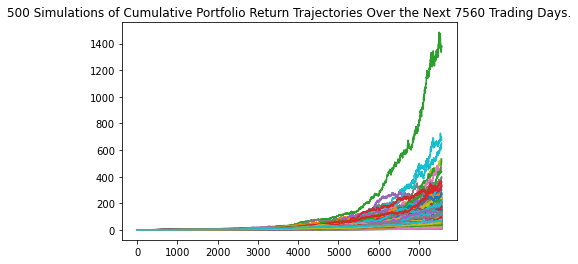

In [44]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
MC_sim_30year_line_plot = MC_portfolio_30year.plot_simulation()
MC_sim_30year_line_plot.get_figure().savefig("500 MCsimulations for 30 years.png")

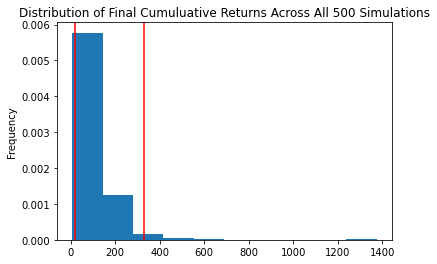

In [45]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
MC_sim_30year_hist_plot = MC_portfolio_30year.plot_distribution()
MC_sim_30year_hist_plot.get_figure().savefig("Probability distribution 30 years.png")

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results,saving the results as a variable

summary_stats_MCsimulation_30year= MC_portfolio_30year.summarize_cumulative_return()

# Review the summary statistics
print(summary_stats_MCsimulation_30year)

count            500.000000
mean             104.577924
std              102.871575
min                6.213693
25%               47.047875
50%               79.273617
75%              130.190033
max             1374.766273
95% CI Lower      16.915594
95% CI Upper     331.432303
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of stock and bond portion of portfolio: USD {total_stocks_bonds}")


Current balance of stock and bond portion of portfolio: USD 75055.9


In [36]:
# Calculate the range of the possible outcomes for the current stock/bond portfolio
# Use the lower and upper `95%` confidence intervals
ci_lower_thirty_cumulative_return = summary_stats_MCsimulation_30year[8]*total_stocks_bonds
ci_upper_thirty_cumulative_return = summary_stats_MCsimulation_30year[9]*total_stocks_bonds

# Print the result of calculations
print(f"There is a 95% chance that current balance of USD 75055.90 in the portfolio"
  f" over the next 30 years will end within the range of"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that current balance of USD 75055.90 in the portfolio over the next 30 years will end within the range of $ 1269615.12 and $ 24875949.79.


### Forecast Cumulative Returns in 10 Years

Adjusting the retirement portfolio weights to the composition of 20% bonds and 80% stocks and running a new Monte Carlo simulation for 10 years to find out if the changes will allow members to retire earlier.

In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10year= MCSimulation(
    portfolio_data=ticker_prices_df,
    weights= [0.2, 0.8],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
MC_portfolio_10year.portfolio_data.head()


AGG                                          \
                             open     high       low    close      volume   
time                                                                        
2018-12-31 00:00:00-05:00  106.12  106.510  105.6200  106.495   8349838.0   
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756.0   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265.0   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476.0   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-12-31 00:00:00-05:00          NaN  249.56  250.16  247.47  248.55   
2019-01-02 00:00:00-05:00     0.000845  245.98  251.21  245.95  249.89   
2019-01-03 00:00:00-05:00     0.004081  248.23  248.57  244.03  244.46   
2019-01-04 00:00:00-05:00    -0.003037  247.59  253.11  247.17  252.41   
2019-01-07 00:00:00-05:00    -0.002109  252.69  255.95  251.69  254.40   

                                                   
                              volume daily_return  
time                                               
2018-12-31 00:00:00-05:00  100767777          NaN  
2019-01-02 00:00:00-05:00  107236613     0.005391  
2019-01-03 00:00:00-05:00  113782919    -0.021730  
2019-01-04 00:00:00-05:00  122528832     0.032521  
2019-01-07 00:00:00-05:00   88317608     0.007884

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shivangigupta/Desktop/GitHub_Upload/challenge5_clone/challenge5_financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981219,1.022693,0.995544,1.005314,0.994773,0.995059,0.999617,0.987236,0.988774,0.999208,...,1.016965,0.989731,0.998382,0.995766,0.997177,1.002942,1.006297,0.980066,1.005008,1.005906
2,0.962765,1.038513,1.010656,1.013185,1.011943,1.015329,0.992914,0.997875,0.969058,1.002088,...,1.012141,0.985620,1.015831,0.985764,0.998598,1.010260,1.003320,0.954444,1.000842,1.003848
3,0.957148,1.041749,1.014896,1.003688,1.024177,1.014430,1.018983,1.011070,0.972827,0.992118,...,1.010970,0.983839,1.021529,0.995386,1.007212,1.031614,1.007907,0.944585,0.994955,1.019423
4,0.969042,1.048431,1.019020,1.013495,1.023189,0.989718,1.021450,1.024137,0.983641,0.993983,...,1.027637,0.992557,1.031597,0.995340,1.010346,1.022690,1.020924,0.951047,0.997308,1.012387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.387598,6.480230,4.169779,2.504536,8.404899,2.892906,5.847975,4.391265,3.606733,4.799972,...,7.593040,8.667613,8.193960,7.807040,23.391454,3.451195,11.266549,4.665359,3.058411,2.525728
2517,4.386925,6.483539,4.209152,2.482731,8.355973,2.874341,5.896366,4.407365,3.558545,4.921892,...,7.690862,8.822845,8.266196,7.874243,23.905688,3.525695,11.080128,4.736133,3.054690,2.542337
2518,4.448357,6.529704,4.230850,2.489855,8.279777,2.922477,6.076975,4.442649,3.520946,4.985559,...,7.636983,8.813403,8.238108,7.951088,23.787812,3.579304,11.141732,4.841460,3.118841,2.553090
2519,4.419187,6.535873,4.224812,2.447778,8.328812,2.922744,6.167044,4.489615,3.559702,5.016766,...,7.631185,8.794512,8.170015,7.931630,23.503371,3.570835,11.248808,4.806535,3.152354,2.569391


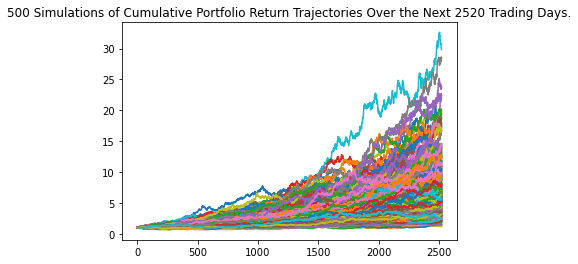

In [46]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
MC_sim_10year_line_plot = MC_portfolio_10year.plot_simulation()
MC_sim_10year_line_plot.get_figure().savefig("10 Year MC simulation.png")

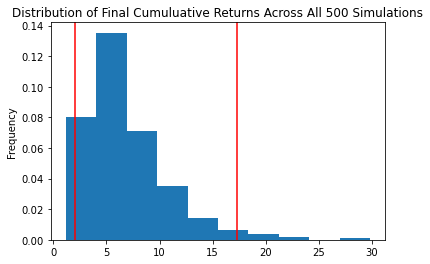

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
MC_sim_10year_hist_plot = MC_portfolio_10year.plot_distribution()


In [47]:
MC_sim_10year_hist_plot.get_figure().savefig("Probability distribution 10 year MCsimulation.png")

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
summary_stats_MCsimulation_10year= MC_portfolio_10year.summarize_cumulative_return()

# Review the summary statistics
print(summary_stats_MCsimulation_10year)


count           500.000000
mean              6.856147
std               3.989233
min               1.172067
25%               4.236635
50%               5.951870
75%               8.288956
max              29.833402
95% CI Lower      1.998723
95% CI Upper     17.336753
Name: 2520, dtype: float64


#### Calculate the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval.

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of stock and bond portion of portfolio: USD {total_stocks_bonds}")

Current balance of stock and bond portion of portfolio: USD 75055.9


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = summary_stats_MCsimulation_10year[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = summary_stats_MCsimulation_10year[9]*total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that current balance of USD 75055.90 in the portfolio"
  f" over the next 10 years will end within the range of"
  f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")



There is a 95% chance that current balance of USD 75055.90 in the portfolio over the next 10 years will end within the range of $ 150015.95 and $ 1301225.59.


#### Analyse: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

With a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG), there is a 95% chance that current balance of USD 75,055.90 in the portfolio will end within in the range of USD 1,269,615.12 and USD 24,875,949.79 over the next 30 years, as calculated by running a Monte Carlo simulation of 500 samples.

Whereas adjusting the retirement portfolio weights to the composition of 20% bonds and 80% stocks(running Monte Carlo Simulation)for 10 years ,there is a 95% chance that current balance of USD 75,055.90 in the portfolio  will end within the range of  USD 150,015.95 and  USD 1,301,225.59.

Above observations confirm that if the person aims to achieve a retirement goal of minimum USD 1,269,615.12,it `may be` achieved over the next 10 years if more weightage is given to stocks to earn higher returns with higher risk as compared to traditional portfolio split, which is evident from upper value of the range i.e. USD 1,301,225.59 at 95% confidence intervals obtained using Monte Carlo simulation for the next 10 year.
However at the same time there are equal chances that portfolio may end up with the lower value of USD 150,015.95 in 10 years. 
So, running more simulations for different weights for equity and bonds and higher time periods than 10 years with the retirement goal value and risk appetite in consideration, it can provide an answer to the number of member's early retirement years or vice versa.